In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Performance metrics in binary classification

In **regression**, we used metrics such as the **mean squared error**, but the analogous metric in classification (the cross-entropy) is not really interpretable for us humans. To analyze our predictions we need to **compare our predictions with reality**.


|         |Predict +     |Predict -     |
|---------|--------------|--------------|
|Reality +|True positive |False negative|
|Reality -|False positive|True negative |

$Precision = \frac{True\:positives}{All\:predicted\:positives}$

$Recall = \frac{True\:positives}{All\:real\:positives}$

$F_1 score = 2 \frac{Precision\:\cdot\:Recall}{Precision\:+\:Recall}$

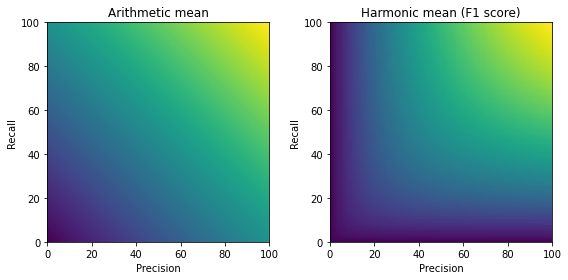

In [2]:
n = 100
precisions = np.linspace(0 + 1 / n, 1, n)
recalls = np.linspace(0 + 1 / n, 1, n)

# Arithmetic mean.
am = np.array([np.mean([p, r]) for p in precisions for r in recalls]).reshape(n, n)

# Harmonic mean.
f1 = np.array([2 * p * r / (p + r) for p in precisions for r in recalls]).reshape(n, n)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].pcolor(am)
ax[1].pcolor(f1)

ax[0].set_title('Arithmetic mean')
ax[0].set_xlabel('Precision')
ax[0].set_ylabel('Recall')
ax[1].set_title('Harmonic mean (F1 score)')
ax[1].set_xlabel('Precision')
ax[1].set_ylabel('Recall')

plt.tight_layout()
plt.show()

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'
mines = pd.read_csv(url, header=None)

x, y = mines.iloc[:, :60], pd.get_dummies(mines[60])['M']

In [4]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression()
model.fit(x, y)

pred = model.predict(x) # I know, I should use a test set.
tn, fp, fn, tp = metrics.confusion_matrix(pred, y).ravel() # Contains TN, FP, FN and TP in the **binary case only**.

print(model.predict_proba(x))

[[0.56273905 0.43726095]
 [0.51605544 0.48394456]
 [0.09823276 0.90176724]
 [0.44901294 0.55098706]
 [0.44700478 0.55299522]
 [0.72144493 0.27855507]
 [0.71654109 0.28345891]
 [0.21171184 0.78828816]
 [0.29337704 0.70662296]
 [0.52988954 0.47011046]
 [0.88261691 0.11738309]
 [0.60877053 0.39122947]
 [0.60558108 0.39441892]
 [0.80575089 0.19424911]
 [0.61343635 0.38656365]
 [0.82368102 0.17631898]
 [0.63726015 0.36273985]
 [0.69965415 0.30034585]
 [0.88096255 0.11903745]
 [0.09031428 0.90968572]
 [0.37283479 0.62716521]
 [0.67076988 0.32923012]
 [0.44588361 0.55411639]
 [0.78878803 0.21121197]
 [0.94235173 0.05764827]
 [0.71308127 0.28691873]
 [0.5216562  0.4783438 ]
 [0.59305277 0.40694723]
 [0.5219952  0.4780048 ]
 [0.43965374 0.56034626]
 [0.58983356 0.41016644]
 [0.82247815 0.17752185]
 [0.72154336 0.27845664]
 [0.43253127 0.56746873]
 [0.62916129 0.37083871]
 [0.55314096 0.44685904]
 [0.79002907 0.20997093]
 [0.81676354 0.18323646]
 [0.86962535 0.13037465]
 [0.85643027 0.14356973]


The model predicts a mine when the probability of being a mine is greater than the probability of being a rock. In a binary setup, this means $P(mine) > 0.5$.

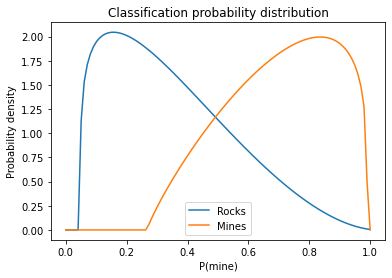

In [6]:
pm = model.predict_proba(x)[:, 1]

br = stats.beta.fit(pm[y == 0])
bm = stats.beta.fit(pm[y == 1])

z = np.linspace(0, 1, 100)

plt.plot(z, stats.beta.pdf(z, br[0], br[1], br[2], br[3]))
plt.plot(z, stats.beta.pdf(z, bm[0], bm[1], bm[2], bm[3]))

plt.title('Classification probability distribution')
plt.xlabel('P(mine)')
plt.ylabel('Probability density')
plt.legend(['Rocks', 'Mines'])

plt.show()

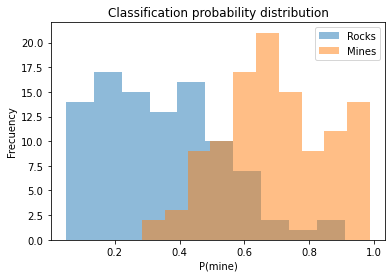

In [7]:
pm = model.predict_proba(x)[:, 1]

plt.hist(pm[y == 0], alpha=0.5)
plt.hist(pm[y == 1], alpha=0.5)

plt.title('Classification probability distribution')
plt.xlabel('P(mine)')
plt.ylabel('Frecuency')
plt.legend(['Rocks', 'Mines'])

plt.show()

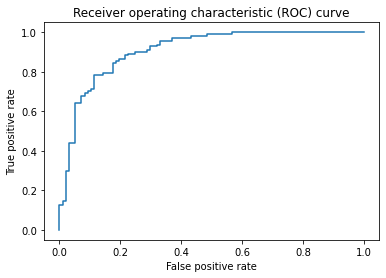

0.9087025169499396


In [8]:
fpr, tpr, thresholds = metrics.roc_curve(y, pm)

plt.plot(fpr, tpr)

plt.title('Receiver operating characteristic (ROC) curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.show()

print(metrics.roc_auc_score(y, pm)) # Watch out, *auc* is outdated.

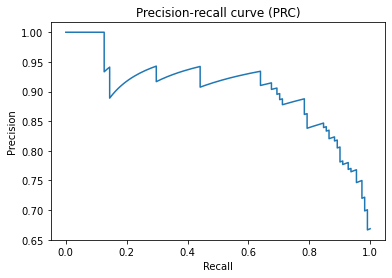

0.9027833104895845

In [9]:
precision, recall, thresholds = metrics.precision_recall_curve(y, pm)

plt.plot(recall, precision)

plt.title('Precision-recall curve (PRC)')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()

metrics.average_precision_score(y, pm)

Remember that $Recall = TPR$ (see [derivations from a confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix))

# K-nearest neighbors classifier
It's a non-parametric classifier.

**Parametric** classifiers such as Logistic Regression, first **fit** a set of optimal parameters from a set of known observations, and then use those parameters to **predict** new observations.

**Non-parametric** classifiers just look at the known observations and compute the predictions from there (there's **nothing to fit** beforehand).

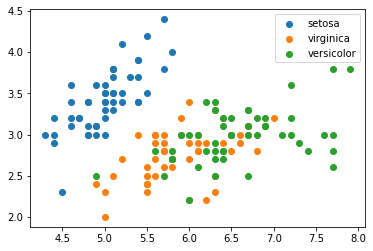

In [10]:
# Let's use a simpler dataset.
from sklearn.datasets import load_iris

x, y = load_iris(return_X_y=True, as_frame=True)

plt.scatter(x.iloc[:, 0][y == 0], x.iloc[:, 1][y == 0])
plt.scatter(x.iloc[:, 0][y == 1], x.iloc[:, 1][y == 1])
plt.scatter(x.iloc[:, 0][y == 2], x.iloc[:, 1][y == 2])

plt.legend(['setosa', 'virginica', 'versicolor'])

plt.show()

In [11]:
y = pd.get_dummies(y)
y.columns = ['setosa', 'virginica', 'versicolor']
y

,setosa,virginica,versicolor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [12]:
class KNearestNeighbors():
    '''Brute force implementation of the K-nearest neighbors classifier'''
    
    def __init__(self, x, y):
        self.x = x # Known features
        self.y = y # Known labels
        
    # Distance metrics
    def euclidean(self, a, b):
        return np.sqrt(((a - b)**2).sum())
    
    def manhattan(self, a, b):
        return (a - b).abs().sum()
    
    # Main algorithm
    
    def choose_distance(self, metric):
        if metric == 'euclidean':
            return self.euclidean
        elif metric == 'manhattan':
            return self.manhattan
        else:
            raise ValueError('Choose a distance metric from ' \
            + '"euclidean" or "manhattan".')
            
    def distance(self, x, metric='euclidean'):
        dist_fun = self.choose_distance(metric)
        return self.x.apply(lambda z: dist_fun(x, z), axis=1) \
            .reset_index(drop=True)
    
    def top_n(self, d, n):
        return d.nsmallest(n).index
    
    def predict_row(self, x, metric, n):
        dist = self.distance(x, metric)
        top_idx = self.top_n(dist, n) # n is the number of neighbors
        votes = self.y.iloc[top_idx].sum()
        return votes.idxmax()
    
    def predict(self, x, n, metric='euclidean'):
        return x.apply(lambda z: self.predict_row(z, metric, n), axis=1) \
            .reset_index(drop=True)
    
    def accuracy(self, pred, y):
        return np.mean(pred == y.idxmax(axis=1).values)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

knn = KNearestNeighbors(x_train, y_train)
pred = knn.predict(x_test, n=5)
acc = knn.accuracy(pred, y_test)
acc

0.9210526315789473

In [13]:
from sklearn.neighbors import KNeighborsClassifier
sk_knn = KNeighborsClassifier(n_neighbors=5)
sk_knn.fit(x_train, y_train)
sk_pred = sk_knn.predict(x_test)
sk_acc = sk_knn.score(x_test, y_test)
sk_acc

0.9210526315789473

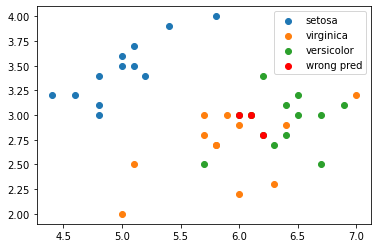

In [14]:
plt.scatter(x_test[y_test['setosa'] == 1].iloc[:, 0], x_test[y_test['setosa'] == 1].iloc[:, 1])
plt.scatter(x_test[y_test['virginica'] == 1].iloc[:, 0], x_test[y_test['virginica'] == 1].iloc[:, 1])
plt.scatter(x_test[y_test['versicolor'] == 1].iloc[:, 0], x_test[y_test['versicolor'] == 1].iloc[:, 1])

idx = pred != y_test.idxmax(axis=1).reset_index(drop=True)
plt.scatter(x_test.reset_index(drop=True)[idx].iloc[:, 0], x_test.reset_index(drop=True)[idx].iloc[:, 1], c='red')

plt.legend(['setosa', 'virginica', 'versicolor', 'wrong pred'])

plt.show()

# Learning curves

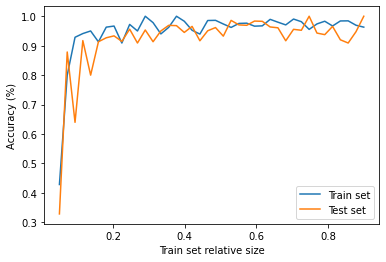

In [15]:
train_acc = []
test_acc= []

train_sizes = np.linspace(0.05, 0.9, 40)
for train_size in train_sizes:
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=train_size)
    sk_knn = KNeighborsClassifier(n_neighbors=5)
    sk_knn.fit(x_train, y_train)

    train_acc.append(sk_knn.score(x_train, y_train))
    test_acc.append(sk_knn.score(x_test, y_test))
    
plt.plot(train_sizes, train_acc)
plt.plot(train_sizes, test_acc)

plt.title('')
plt.xlabel('Train set relative size')
plt.ylabel('Accuracy (%)')
plt.legend(['Train set', 'Test set'])

plt.show()